# Ticket categorization LSTMs

In [214]:
# Local 
import random

# Third party
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [215]:
# Constants
TRAIN_DATA_PATH = "/home/ggupta/TicketPro/training_data.csv"
VALIDATION_DATA_PATH = "/home/ggupta/TicketPro/validation_data.csv"
LABELS_KEY = {"Software": 0,
              "Network": 1,
              "Hardware": 2}
TRAINING_PROPORTION = 0.8
VOCAB_SIZE = 2000
OOV_TOKEN = "<OOV>"
EMBEDDING_DIM = 16
PADDED = 10
NUM_EPOCHS=20
MAX_LENGTH=13
TRUNC_TYPE="post"

### Data preprocessing

In [217]:
# Get data and labels into lists
data_df = pd.read_csv(TRAIN_DATA_PATH)
brief_descriptions = data_df["Brief description"].tolist()
subjects = data_df["Subject"].tolist()
sentences = [x + ": " + y for x, y in zip(subjects, brief_descriptions)]
labels = data_df["Category"].tolist()
labels = [LABELS_KEY[x] for x in labels]
indices= list(range(len(sentences)))
random.shuffle(indices)
train_sentences = [sentences[i] for i in indices]
labels = [labels[i] for i in indices]
train_labels = to_categorical(labels, num_classes=len(LABELS_KEY))

val_data_df = pd.read_csv(VALIDATION_DATA_PATH)
val_brief_descriptions = val_data_df["Brief description"].tolist()
val_subjects = val_data_df["Subject"].tolist()
val_sentences = [x + ": " + y for x, y in zip(val_subjects, val_brief_descriptions)]
val_labels = val_data_df["Category"].tolist()
val_labels = [LABELS_KEY[x] for x in val_labels]
indices= list(range(len(val_sentences)))
random.shuffle(indices)
test_sentences = [val_sentences[i] for i in indices]
val_labels = [val_labels[i] for i in indices]
test_labels = to_categorical(val_labels, num_classes=len(LABELS_KEY))


# Tokenization
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index

train_sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=MAX_LENGTH, truncating=TRUNC_TYPE)

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=MAX_LENGTH, truncating=TRUNC_TYPE)


In [218]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=train_padded.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Setup the training parameters
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 13, 16)            32000     
                                                                 
 flatten_18 (Flatten)        (None, 208)               0         
                                                                 
 dense_36 (Dense)            (None, 6)                 1254      
                                                                 
 dense_37 (Dense)            (None, 3)                 21        
                                                                 
Total params: 33,275
Trainable params: 33,275
Non-trainable params: 0
_________________________________________________________________


In [219]:

# Train the model
history = model.fit(train_padded, train_labels, epochs=NUM_EPOCHS, validation_data=(test_padded, test_labels))

Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 1.1089 - accuracy: 0.2336 - val_loss: 1.0792 - val_accuracy: 0.6571
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 1.0915 - accuracy: 0.4234 - val_loss: 1.0945 - val_accuracy: 0.4571
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 1.0820 - accuracy: 0.4818 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 1.0734 - accuracy: 0.5109 - val_loss: 1.1180 - val_accuracy: 0.1429
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 1.0644 - accuracy: 0.5109 - val_loss: 1.1262 - val_accuracy: 0.0286
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 1.0540 - accuracy: 0.5328 - val_loss: 1.1344 - val_accuracy: 0.0286
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 1.0432 - accuracy: 0.5474 - val_loss: 1.1411 - val_accuracy: 0.0000e+00
Epoch 8/20
5/5 [=======

### Visualization

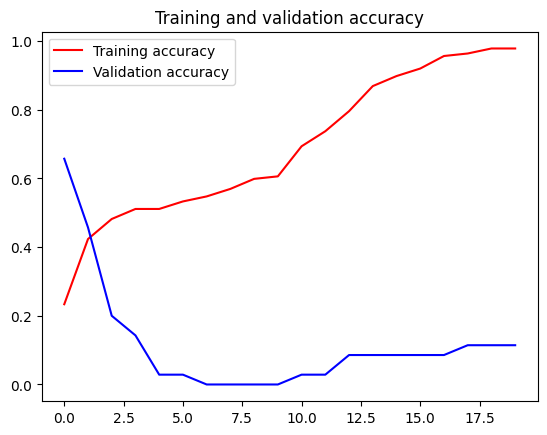

<Figure size 640x480 with 0 Axes>

In [220]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()